# Teleostean Genomics, TE comparative data
## Loading modules

In [228]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from bokeh.plotting import *
from bokeh.models import ColumnDataSource
from bokeh.models import *
from bokeh.io import output_notebook
matplotlib.style.use('ggplot')
import seaborn as sns
from itertools import cycle, islice
output_notebook()
%matplotlib inline

BokehJS successfully loaded.

## The data is merged RepeatMasker .summary files

RepeatMasker has been run using a custom repeat library (produces by RepeatModeler and LTRharvest) merged with eukaryotic RepBase repeats.

The .out files produced by RepeatMasker have been filtered so that only elements ≥ 80 bp and showing ≥ 80% similarity are included. These .outfiles are used to produces .summary files, that are concatenated and fed into a dataframe.

The dataframe **df** contains each repeat detected in each fish with data on count, assembly coverage in bps and percent of assembly.


In [229]:
df = pd.read_csv("all.summaries.final", delim_whitespace = True)
df = df.dropna(axis=0)

In [230]:
df

,Alias,Repeat,Count,Bp_masked,Percentage_masked
0,fish_10,ARTEFACT,3,165,0.00
1,fish_10,DNA,95193,10983375,2.54
2,fish_10,Academ,496,57706,0.01
3,fish_10,Academ2,15,857,0.00
4,fish_10,CMC-Chapaev,561,31737,0.01
5,fish_10,CMC-Chapaev-3,223,9522,0.00
6,fish_10,CMC-EnSpm,24945,1800462,0.42
7,fish_10,CMC-Mirage,6,306,0.00
8,fish_10,CMC-Transib,547,35587,0.01
9,fish_10,Crypton,527,26695,0.01


The dataframe **df2** contains additional information for each fish, for now including names and phylogenetic information. More info may be added, like genome size, GC content and population size.

In [231]:
df2 = pd.read_csv("NumberAndOrder_withFish_", sep = "\t", encoding = 'utf-8' )
df2.head()

,Alias,Order,Species,Common_name
0,fish_50,Ateleopodiformes,Guentherus altivela,Jellynose
1,fish_42,Aulopiformes,Parasudis fraserbrunneri,Tripodfish
2,fish_44,Aulopiformes,Saurida brasiliensis,Brazilian lizardfish
3,fish_45,Aulopiformes,Synodus synodus,Diamond lizardfish
4,fish_39,Batrachoidiformes,Perulibatrachus rossignoli,Rossignol toadfish


A merge between **df** and **df2** produces a table containing all the current information.

In [233]:
main = pd.merge(df, df2, how = 'left')
main.head()

,Alias,Repeat,Count,Bp_masked,Percentage_masked,Order,Species,Common_name
0,fish_10,ARTEFACT,3,165,0.00,Gadiformes,Molva molva,Ling
1,fish_10,DNA,95193,10983375,2.54,Gadiformes,Molva molva,Ling
2,fish_10,Academ,496,57706,0.01,Gadiformes,Molva molva,Ling
3,fish_10,Academ2,15,857,0.00,Gadiformes,Molva molva,Ling
4,fish_10,CMC-Chapaev,561,31737,0.01,Gadiformes,Molva molva,Ling


# Plotting data

## Bar plot of total content, colored according to order. There are not enough colors!

/Users/williambrynildsen/.local/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


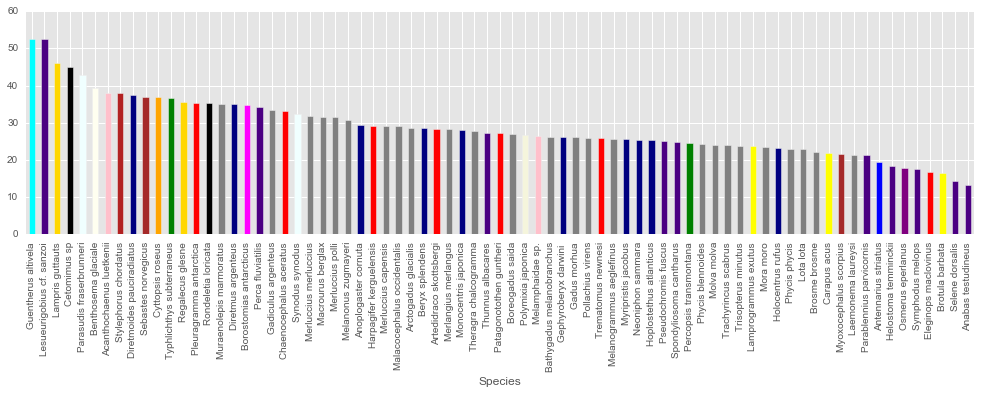

In [221]:
colors = {'Percopsiformes': 'green', 'Gadiformes': 'gray',  
          'Ophidiiformes': 'yellow', 'Ateleopodiformes': 'cyan', 
          'Lophiiformes': 'blue', 'Osmeriformes': 'purple', 
          'Notothenioidei': 'red', 'Stomiformes': 'magenta',
         'Cetomimiformes' : 'black', 'Beryciformes': "navy",
         'Stephanoberyciformes': 'pink', 'Stylephoriformes': "firebrick",
         'Scorpaeniformes': 'brown', 'Polymyxiformes' : 'beige', 'Zeiformes': 'orange',
         'Aulopiformes': 'azure', 'Lampriformes': 'gold', 'Perciformes': 'indigo',
         'Myctophiformes': 'ivory'}

main_perc = main[main["Repeat"]=='Total'].sort("Percentage_masked"
                                             ,ascending = False)[["Order", "Species", "Repeat", "Percentage_masked"]]

main_perc.head()

theplot = main_perc.plot('Species', 'Percentage_masked', color = [colors[i] for i in main_perc['Order']], kind='bar',
               figsize =(17,4), legend = None)

# Scatter plot of total content
### Fractions of assemblies

In [227]:
factors = list(main["Species"].unique())

output_file("75_teleost_total_percentage.html")
x = main[main["Repeat"]=='Total'][["Percentage_masked"]].iloc[:]['Percentage_masked']

#Trying to add tools for hovering

resize = ResizeTool()
pan = PanTool()
wheel = WheelZoomTool()
reset = ResetTool()

hover = HoverTool(
        tooltips=[
            ("Species", "$y"),
            ("Percentage masked", "$x")
        ]
    )

p = figure(y_range=factors, tools = [resize, hover, pan, wheel], 
            outline_line_color="black",
    background_fill="#f0e1d2")



p.circle(x, factors, size=10, fill_color="yellow", line_color="black", line_width=1)
p.title = "Total repeat content"
p.xaxis.axis_label = 'Percentage of assembly covered'
p.yaxis.axis_label = 'Species'

show(p)

### Number of elements in assemblies

In [9]:
factors = list(main["Species"].unique())

output_file("75_teleost_total_number.html")
x = main[main["Repeat"]=='Total'][["Count"]].iloc[:]['Count']

#Trying to add tools for hovering

resize = ResizeTool()
pan = PanTool()
wheel = WheelZoomTool()
reset = ResetTool()

hover = HoverTool(
        tooltips=[
            ("Species", "$y"),
            ("Count", "$x")
        ]
    )

p = figure(y_range=factors, tools = [resize, hover, pan, wheel], 
            outline_line_color="black",
    background_fill="#f0e1d2")



p.circle(x, factors, size=10, fill_color="beige", line_color="black", line_width=1)
p.title = "Total repeat content"
p.xaxis.axis_label = 'Count'
p.yaxis.axis_label = 'Species'

show(p)

### Bps covered in assemblies

In [ ]:
factors = list(main["Species"].unique())

output_file("75_teleost_total_bps.html")
x = main[main["Repeat"]=='Total'][["Bp_masked"]].iloc[:]['Bp_masked']

#Trying to add tools for hovering

resize = ResizeTool()
pan = PanTool()
wheel = WheelZoomTool()
reset = ResetTool()

hover = HoverTool(
        tooltips=[
            ("Species", "$y"),
            ("Bps covered", "$x")
        ]
    )

p = figure(y_range=factors, tools = [resize, hover, pan, wheel], 
            outline_line_color="black",
    background_fill="#f0e1d2")



p.circle(x, factors, size=10, fill_color="gray", line_color="black", line_width=1)
p.title = "Total repeat content"
p.xaxis.axis_label = 'Bps masked'
p.yaxis.axis_label = 'Species'

show(p)

# Presence/absence matrix

In [223]:
# Creating list of unique repeats
unique_repeats01 = main[main["Count"]>0][["Repeat"]].iloc[:]["Repeat"].unique()
print len(unique_repeats01)
print unique_repeats01

199442
['ARTEFACT' 'DNA' 'Academ' ..., 'rnd-5_family-9781' 'rnd-5_family-9786'
 'rnd-5_family-9797']


In [224]:
# Creating list of species
species = main[['Species']].iloc[:]['Species'].unique()
print len(species)
print species

75
[u'Molva molva' u'Lota lota' u'Brosme brosme' u'Merluccius merluccius'
 u'Merluccius capensis' u'Merluccius polli' u'Melanonus zugmayeri'
 u'Macrourus berglax' u'Malacocephalus occidentalis'
 u'Bathygadus melanobranchus' u'Arctogadus glacialis'
 u'Muraenolepis marmoratus' u'Mora moro' u'Laemonema laureysi'
 u'Polymixia japonica' u'Percopsis transmontana'
 u'Typhlichthys subterraneus' u'Boreogadus saida' u'Cyttopsis roseus'
 u'Lamprogrammus exutus' u'Brotula barbata' u'Carapus acus'
 u'Myripristis jacobus' u'Holocentrus rufus' u'Trachyrincus scabrus'
 u'Melamphaidae sp.' u'Trisopterus minutus' u'Parasudis fraserbrunneri'
 u'Synodus synodus' u'Regalecus glesne' u'Lampris guttauts'
 u'Pollachius virens' u'Guentherus altivela' u'Antennarius striatus'
 u'Osmerus eperlanus' u'Perca fluviatilis' u'Sebastes norvegicus'
 u'Eleginops maclovinus' u'Patagonotothen guntheri' u'Trematomus newnesi'
 u'Melanogrammus aeglefinus' u'Pleuragramma antarctica'
 u'Chaenocephalus aceratus' u'Artedidraco sk

In [90]:
#Filter using this function

inclusion = ["Gypsy/Ty3, BEL/Pao, Copia/Ty1, ERV, DIRS1/Ngaro, \
Penelope, Dong/Rex6, R2, LINE1/TX1, RTE/Rex3, CR1/LINE3, LINE2/Maui, \
Rex1/Babar, Jockey, Nimb, Vingi, Proto2-like, LOA/Tad1-like, Tc-Mariner, \
hAT, PIF/Harbinger, PiggyBac, Sola, MULE/MuDR, CMC/EnSpm, CMC/Chapaev, Merlin, \
Kolobok, P, Dada, Academ, Ginger, Zator, Novosib-like, Transib, Crypton, Helitron, \
Maverick, Zisupton"]

def filter_list(repeats):
    list_of_unique_repeats = []
    for i in repeats:
        #Enter filtering here, like example below:
        if "TcMar-Gizmo" in i:
            list_of_unique_repeats.append(i)
    return list_of_unique_repeats

print len(filter_list(unique_repeats01))
print filter_list(unique_repeats01)

1
['TcMar-Gizmo']


In [225]:
# Creating list of unique repeats found in each species:
def create_list_of_unique_repeats_per_species(x,y):
    list_of_unique_repeats_per_species = []
    for index_row, i in x.iterrows():
        for name in inclusion:
            if i["Repeat"] in name:
                list_of_unique_repeats_per_species.append([i["Repeat"], i["Species"], 
                                                           i["Order"], i["Count"],  i["Percentage_masked"], 
                                                           i["Bp_masked"]])
    
    return list_of_unique_repeats_per_species

# Creating data for matrix, a list of lists.
data_for_matrix = create_list_of_unique_repeats_per_species(main[0:100000], filter_list(unique_repeats01))

In [213]:
# Creating a DataFrame from the data
matrix_df = pd.DataFrame(data_for_matrix)

print matrix_df.head()
# Choose layout for heatmap
matrix_for_seaborn = matrix_df.pivot_table(index = 0, columns = 1, values = 3)
print matrix_for_seaborn

           0            1           2      3     4       5
0     Academ  Molva molva  Gadiformes    496  0.01   57706
1    Crypton  Molva molva  Gadiformes    527  0.01   26695
2       Dada  Molva molva  Gadiformes   1917  0.03  134913
3     Ginger  Molva molva  Gadiformes  11105  0.21  892112
4  Harbinger  Molva molva  Gadiformes     29  0.00    2155
1          Brosme brosme  Lota lota  Merluccius capensis  \
0                                                          
Academ             924.0        481                999.0   
CR1                420.0        360                532.0   
Copia             3929.0       3560               3585.0   
Crypton            415.0        489               1426.0   
DIRS              1735.0       1339               1042.0   
DIRS1                1.0          3                  NaN   
Dada              1500.0       1766               2101.0   
Dong                 1.0        NaN                  NaN   
ERV               2303.0       3829           

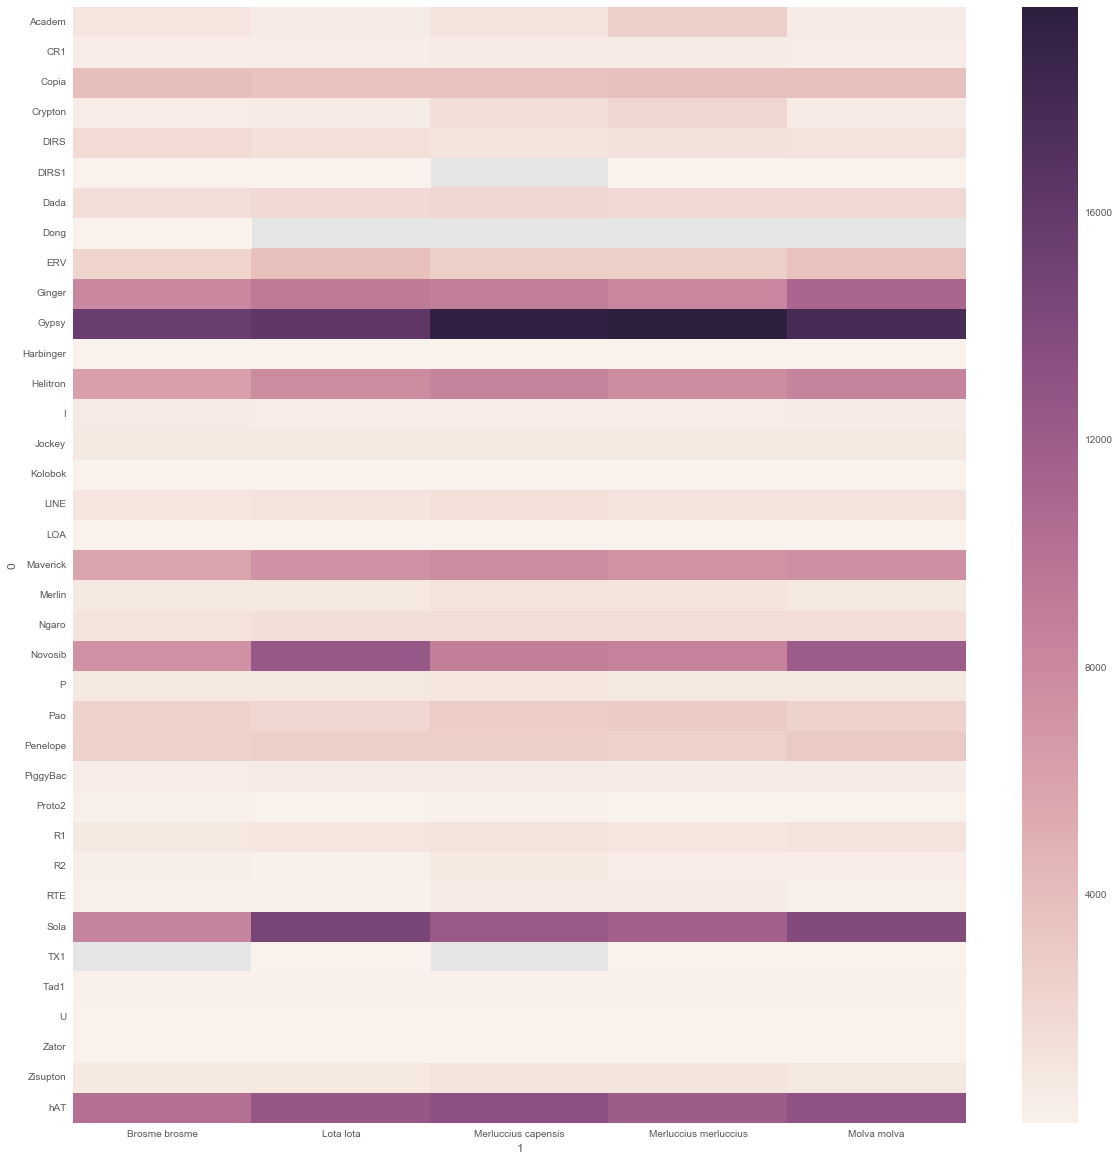

In [226]:
# Pick a color:
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
# CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, 
# Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
# Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
# PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, 
# RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, 
# Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, 
# YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
# binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, 
# copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, 
# gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
# gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
# gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, 
# nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
# prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, 
# summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(matrix_for_seaborn, ax=ax)

# Search for different transposons

In [ ]:
main[main["Repeat"]=='SINE'][["Repeat","Species", "Count", "Order"]].sort_values(by="Order",
                                                                        ascending = False)

In [ ]:
getdefaultencoding()